In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('m8.6_srt_data.csv')

In [32]:
df = data.copy()
print(f'df.shape = {df.shape}')
df.head()

df.shape = (4824, 6)


,ts,serialNo,home,batteryVoltageMilliV,insideTemperatureCentiC,humidityMilliPerc
0,2018-10-01,VA4202760704,165132,2787.1310,1953.0737,575.49180
1,2018-10-02,VA4202760704,165132,2786.1047,1901.0000,550.63710
2,2018-10-03,VA4202760704,165132,2784.6934,1878.0369,550.09204
3,2018-10-04,VA4202760704,165132,2773.3500,1976.9114,583.65820
4,2018-10-05,VA4202760704,165132,2776.4314,2041.4010,589.74110


#### Задание 8.6.1-2-3

Выберите данные с датчика с серийным номером VA2170620672.

Укажите максимальное значение напряжения на батарее (batteryVoltageMilliV).

Для того же датчика укажите значение напряжения на батарее, соответствующее 75% квантиля распределения

Для того же датчика выберите данные за ноябрь 2018 и укажите медианное значение на влажности (humidityMilliPerc) 

In [4]:
df.isna().sum()

ts                         0
serialNo                   0
home                       0
batteryVoltageMilliV       3
insideTemperatureCentiC    2
humidityMilliPerc          0
dtype: int64

In [6]:
df.serialNo.unique()

array(['VA4202760704', 'VA2048854528', 'VA1193214976', 'VA1716324096',
       'VA2836597248', 'VA1274217216', 'VA1650526976', 'VA2204175104',
       'VA2254506752', 'VA2220952320', 'VA1403717888', 'VA3182037248',
       'VA4112452096', 'VA2170620672', 'VA2594769152', 'VA1813907968',
       'VA2509703424', 'VA3013019904', 'VA3105819136', 'VA2412775168',
       'VA1730087424', 'VA3536849408', 'VA0346098176', 'VA1617037568',
       'VA2297627392'], dtype=object)

In [24]:
#Укажите максимальное значение напряжения на батарее (batteryVoltageMilliV).
df = data[data.serialNo == 'VA2170620672']
bvm = df.batteryVoltageMilliV.max()
print(bvm)

3219.567


In [25]:
#Для того же датчика укажите значение напряжения на батарее, соответствующее 75% квантиля распределения
serNo1 = 'VA2170620672'

data_sensor_1 = data[data.serialNo == serNo1]
print(data_sensor_1.batteryVoltageMilliV.quantile(.75))

2951.2801


In [29]:
#Для того же датчика выберите данные за ноябрь 2018 и укажите медианное значение на влажности (humidityMilliPerc) 
df = data[data.serialNo == 'VA2170620672']
df1 = df[data.ts < '2018-12-01']
df2 = df1[data.ts >= '2018-11-01']
# print(df2.ts)
humipe = df2.humidityMilliPerc.median()
print(humipe)

566.3562


/tmp/ipykernel_14010/2446904265.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[data.ts < '2018-12-01']
/tmp/ipykernel_14010/2446904265.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[data.ts >= '2018-11-01']


#### Задание 8.6.4

Выберите данные с датчика с серийным номером VA2048854528.

Постройте график напряжения на батарее (batteryVoltageMilliV).

Укажите, сколько раз батарея была заменена (количество пиков со значением выше 3200 mV). (answer is 1)

<AxesSubplot:xlabel='ts'>

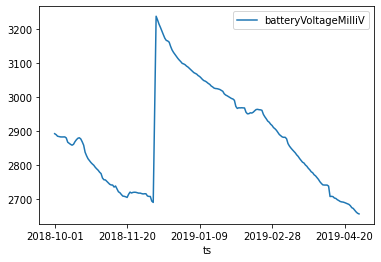

In [31]:
df = data[data.serialNo == 'VA2048854528']
df.plot('ts', 'batteryVoltageMilliV')

#### Задание 8.6.5
Укажите, сколько значений температуры (среди всех данных) лежат строго ниже 1200сС (12 градусов Цельсия)

In [35]:
df = data[data.insideTemperatureCentiC < 1200]
print(len(df))

92


#### Задание 8.6.6
Укажите, сколько значений температуры (среди всех данных) лежат нестрого выше 75%-квантиля, вычисленного по всем датчикам

In [36]:
#8.6.6
quan_75 = data.insideTemperatureCentiC.quantile(.75)
print(data[data.insideTemperatureCentiC >= quan_75].shape[0])

1206
